In [1]:
import numpy as np
import matplotlib.pyplot as plt

from math import *
from cmath import *
from numpy import linalg

import warnings
warnings.filterwarnings('ignore')

# Etapa 2:

In [2]:
def CalcularTransformador(v1, rc):
    zParalelo = 1/(1/XC+1/rc)
    Z=np.array([[R1+XL+XC, -XM],[-XM, XL+R2+zParalelo]])
    V=np.array([v1,0])
    I=np.dot(linalg.inv(Z),V)
    return I[0], I[1], zParalelo

In [3]:
R1 = 0.5
R2 = 0.5
C = 0.1e-6
L = 196e-6 

freq = np.arange(20_000, 60_000)
k = 0.1

# Etapa 3:

In [4]:
V1 = 5
Rc = 10

In [5]:
i1, i2 = [], []
S1, S2 = [], []
for f in freq:
    w = 2*pi*f
    M = k*L
    XM = 1j*w*M
    XC = 1/(1j*w*C)
    XL = 1j*w*L
    
    corrente1, corrente2, zParalelo = CalcularTransformador(V1, Rc)
    i1.append(corrente1)
    i2.append(corrente2)
    
    V2=corrente2*zParalelo
    pot2 = V2*corrente2.conjugate()/2
    
    S1.append(V1*corrente1.conjugate()/2)
    S2.append(pot2.real)

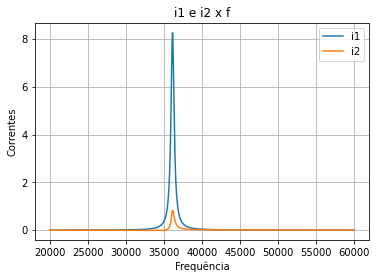

In [6]:
plt.plot(freq, i1, label="i1")
plt.plot(freq, i2, label="i2")
plt.title('i1 e i2 x f')
plt.xlabel('Frequência')
plt.ylabel('Correntes')
plt.legend()
plt.grid()
plt.show()

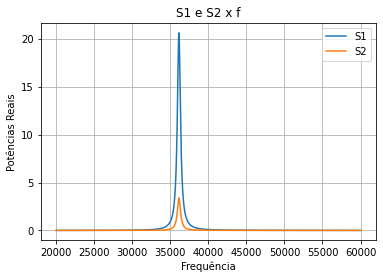

In [7]:
plt.plot(freq, S1, label="S1")
plt.plot(freq, S2, label="S2")
plt.title('S1 e S2 x f')
plt.xlabel('Frequência')
plt.ylabel('Potências Reais')
plt.legend()
plt.grid()
plt.show()

# Etapa 4:

In [8]:
V1 = 10/pi
Rc = 400

In [9]:
i1, i2 = [], []
S1, S2 = [], []
ganho = []
for f in freq:
    w = 2*pi*f
    M = k*L
    XM = 1j*w*M
    XC = 1/(1j*w*C)
    XL = 1j*w*L
    
    corrente1, corrente2, zParalelo = CalcularTransformador(V1, Rc)
    i1.append(corrente1)
    i2.append(corrente2)
    
    V2=corrente2*zParalelo
    
    pot1 = V1*corrente1.conjugate()/2
    pot2 = V2*corrente2.conjugate()/2
    
    S1.append(pot1.real)
    S2.append(pot2.real)
    ganho.append(pot2.real/pot1.real)

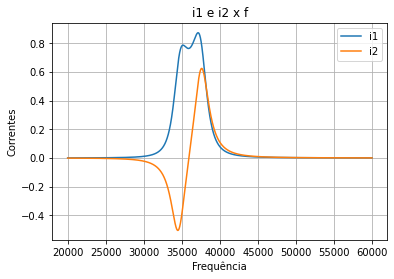

In [10]:
plt.plot(freq, i1, label="i1")
plt.plot(freq, i2, label="i2")
plt.title('i1 e i2 x f')
plt.xlabel('Frequência')
plt.ylabel('Correntes')
plt.legend()
plt.grid()
plt.show()

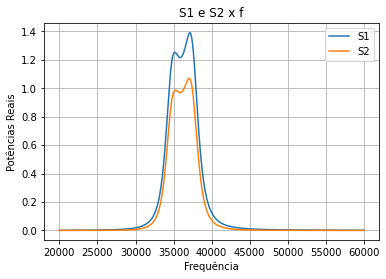

In [11]:
plt.plot(freq, S1, label="S1")
plt.plot(freq, S2, label="S2")
plt.title('S1 e S2 x f')
plt.xlabel('Frequência')
plt.ylabel('Potências Reais')
plt.legend()
plt.grid()
plt.show()

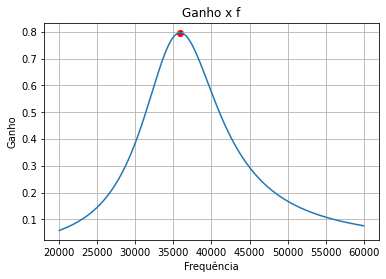

In [34]:
plt.scatter(35883,0.79683,color='red')
plt.plot(freq, ganho)
plt.title('Ganho x f')
plt.xlabel('Frequência')
plt.ylabel('Ganho')
plt.grid()
plt.show()

In [28]:
ind = ganho.index(max(ganho))
print(f"Melhor Frequência: {freq[ind]}Hz\nGanho: {max(ganho)*100:.3f}%")

Melhor Frequência: 35,883Hz
Ganho: 79.683%
